In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('train.csv', index_col=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Outliners cleaning

<Axes: >

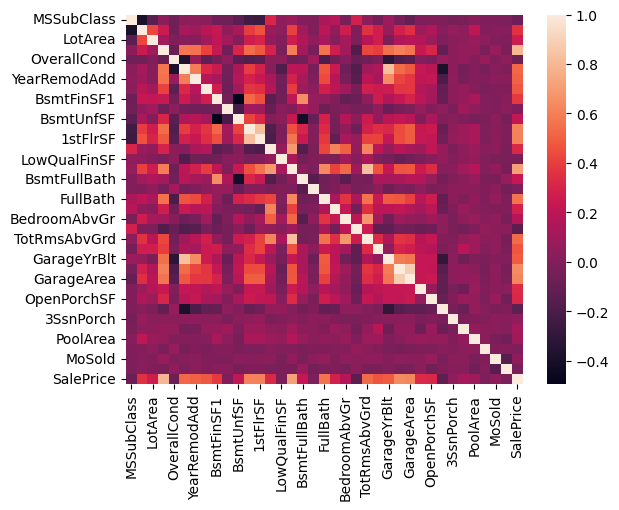

In [3]:
sns.heatmap(df.select_dtypes(exclude=['object']).corr())

In [4]:
df.select_dtypes(exclude=['object']).corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

c:\Users\artse\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


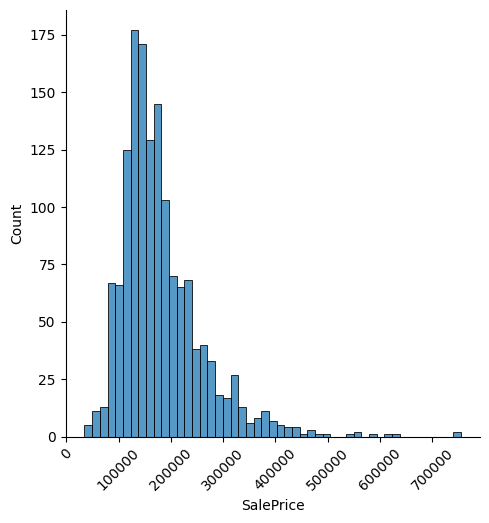

In [5]:
sns.displot(df.SalePrice)
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

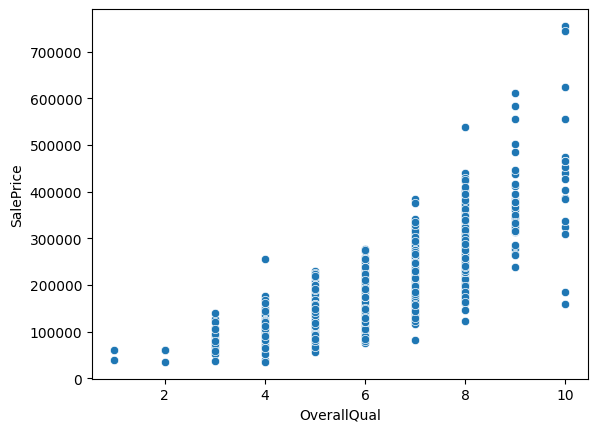

In [6]:
sns.scatterplot(x='OverallQual',y='SalePrice',data=df)

In [7]:
idx1 = df[(df['OverallQual']>8) & (df['SalePrice']<200000)].index
idx1

Index([524, 1299], dtype='int64', name='Id')

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

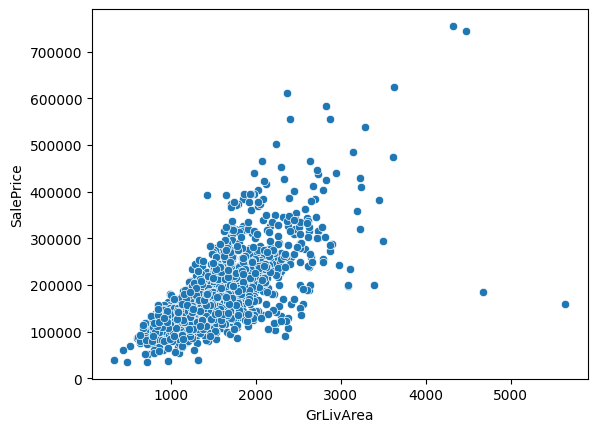

In [8]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)

In [9]:
idx2 = df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 200000)].index
idx2

Index([524, 1299], dtype='int64', name='Id')

In [10]:
df = df.drop(idx1, axis=0)
df.shape

(1458, 80)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

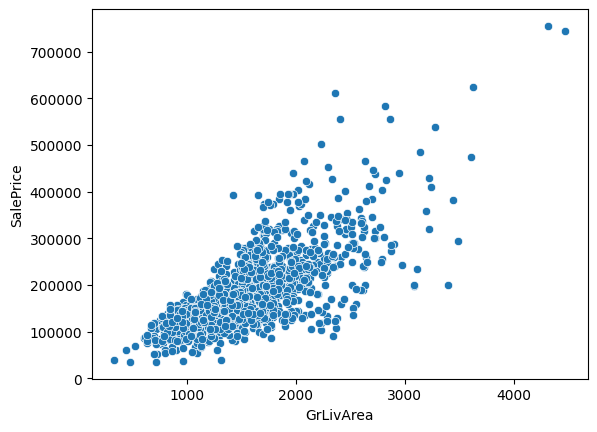

In [11]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)

Missing values dealing

In [12]:
test_df = pd.read_csv('test.csv', index_col=0)
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [13]:
def show_nans(df: pd.DataFrame) -> pd.DataFrame:
    df = pd.DataFrame(df.isna().sum().sort_values() / len(df) * 100, columns=['Percentage'])
    return df[df.Percentage > 0]

show_nans(df)

,Percentage
Electrical,0.068587
MasVnrArea,0.548697
BsmtFinType1,2.537723
BsmtCond,2.537723
BsmtQual,2.537723
BsmtExposure,2.606310
BsmtFinType2,2.606310
GarageYrBlt,5.555556
GarageQual,5.555556
GarageFinish,5.555556


In [14]:
show_nans(test_df)

,Percentage
GarageCars,0.068540
GarageArea,0.068540
KitchenQual,0.068540
Exterior1st,0.068540
SaleType,0.068540
Exterior2nd,0.068540
TotalBsmtSF,0.068540
BsmtUnfSF,0.068540
BsmtFinSF1,0.068540
BsmtFinSF2,0.068540


Here we check whether test dataframe has more NaN columns.

In [15]:
for column in set(show_nans(test_df).index) - set(show_nans(df).index):
    test_df[column] = test_df[column].fillna(test_df[column].value_counts().index[0])

Now we need to fill NaN

In [16]:
df[show_nans(df).index.to_list()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458 entries, 1 to 1460
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Electrical    1457 non-null   object 
 1   MasVnrArea    1450 non-null   float64
 2   BsmtFinType1  1421 non-null   object 
 3   BsmtCond      1421 non-null   object 
 4   BsmtQual      1421 non-null   object 
 5   BsmtExposure  1420 non-null   object 
 6   BsmtFinType2  1420 non-null   object 
 7   GarageYrBlt   1377 non-null   float64
 8   GarageQual    1377 non-null   object 
 9   GarageFinish  1377 non-null   object 
 10  GarageCond    1377 non-null   object 
 11  GarageType    1377 non-null   object 
 12  LotFrontage   1199 non-null   float64
 13  FireplaceQu   768 non-null    object 
 14  MasVnrType    586 non-null    object 
 15  Fence         281 non-null    object 
 16  Alley         91 non-null     object 
 17  MiscFeature   54 non-null     object 
 18  PoolQC        6 non-null      obj

In [17]:
def change_df(df: pd.DataFrame) -> pd.DataFrame:
    simpleNA = df.select_dtypes(include=['object']).columns
    
    for column in simpleNA:
        df[column] = df[column].fillna('None')
    
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(1900)

    for column in df.select_dtypes(exclude=['object']).columns:
        df[column] = df[column].fillna(0)

    
    return df

In [18]:
filled_df = change_df(df)
show_nans(filled_df)

,Percentage


In [19]:
filled_test_df = change_df(test_df)
show_nans(filled_test_df)

,Percentage


In [20]:
filled_df.shape

(1458, 80)

In [21]:
filled_df.PoolQC.unique()

array(['None', 'Ex', 'Fa', 'Gd'], dtype=object)

In [22]:
def cat_preprocessing(df: pd.DataFrame) -> pd.DataFrame:
    dct = {'ExterQual': {name: idx for idx, name in enumerate('Po Fa TA Gd Ex'.split(), start=1)},
           'ExterCond': {name: idx for idx, name in enumerate('Po Fa TA Gd Ex'.split(), start=1)},
           'BsmtQual': {name: idx for idx, name in enumerate('None Po Fa TA Gd Ex'.split())},
           'BsmtCond': {name: idx for idx, name in enumerate('None Po Fa TA Gd Ex'.split())},
           'BsmtExposure': {name: idx for idx, name in enumerate('None No Mn Av Gd'.split())},
           'BsmtFinType1': {name: idx for idx, name in enumerate('None Unf LwQ Rec BLQ ALQ GLQ'.split())},
           'BsmtFinType2': {name: idx for idx, name in enumerate('None Unf LwQ Rec BLQ ALQ GLQ'.split())},
           'HeatingQC': {name: idx for idx, name in enumerate('Po Fa TA Gd Ex'.split())},
           'CentralAir': {'N': 0, 'Y': 1},
           'KitchenQual': {name: idx for idx, name in enumerate('Po Fa TA Gd Ex'.split())},
           'FireplaceQu': {name: idx for idx, name in enumerate('None Po Fa TA Gd Ex'.split())},
           'GarageFinish': {name: idx for idx, name in enumerate('None Unf RFn Fin'.split())},
           'GarageQual': {name: idx for idx, name in enumerate('None Po Fa TA Gd Ex'.split())},
           'GarageCond': {name: idx for idx, name in enumerate('None Po Fa TA Gd Ex'.split())},
           'PavedDrive': {name: idx for idx, name in enumerate('N P Y'.split(), start=1)},
           'PoolQC': {name: idx for idx, name in enumerate('None Fa TA Gd Ex'.split())},
           'Fence': {name: idx for idx, name in enumerate('None MnWw GdWo MnPrv GdPrv'.split())},
           }

    df = df.replace(dct)
    return df

In [23]:
f_filled_df = cat_preprocessing(filled_df)
f_filled_df.GarageCond.unique()

array([3, 2, 0, 4, 1, 5], dtype=int64)

In [24]:
f_filled_test_df = cat_preprocessing(filled_test_df)
f_filled_test_df.GarageCond.unique()

array([3, 0, 2, 4, 1, 5], dtype=int64)

In [25]:
f_filled_df.select_dtypes(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,Functional,GarageType,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,None,WD,Normal
2,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,MetalSd,None,CBlock,GasA,SBrkr,Typ,Attchd,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,None,WD,Normal
4,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Wd Shng,None,BrkTil,GasA,SBrkr,Typ,Detchd,None,WD,Abnorml
5,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,VinylSd,None,PConc,GasA,SBrkr,Typ,Attchd,None,WD,Normal
1457,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Plywood,Stone,CBlock,GasA,SBrkr,Min1,Attchd,None,WD,Normal
1458,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,CmentBd,None,Stone,GasA,SBrkr,Typ,Attchd,Shed,WD,Normal


In [26]:
from sklearn.preprocessing import LabelEncoder


final_df = f_filled_df.copy()
final_test_df = f_filled_test_df.copy()

for column in final_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    le.fit(final_df[column])
    final_df[column] = le.transform(final_df[column])
    final_test_df[column] = le.transform(final_test_df[column])

final_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,1,1,3,3,0,4,...,0,0,0,1,0,2,2008,8,4,208500
2,20,3,80.0,9600,1,1,3,3,0,2,...,0,0,0,1,0,5,2007,8,4,181500
3,60,3,68.0,11250,1,1,0,3,0,4,...,0,0,0,1,0,9,2008,8,4,223500
4,70,3,60.0,9550,1,1,0,3,0,0,...,0,0,0,1,0,2,2006,8,0,140000
5,60,3,84.0,14260,1,1,0,3,0,2,...,0,0,0,1,0,12,2008,8,4,250000


In [27]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X, y = final_df.drop(columns=['SalePrice']), final_df.SalePrice
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=X.columns)
final_test_df = pd.DataFrame(scaler.transform(final_test_df), columns=final_test_df.columns)
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.073426,-0.045563,0.223761,-0.203934,0.064282,0.024716,0.749788,0.31239,-0.026198,0.604187,...,-0.270407,-0.063709,-0.058207,-0.470261,-0.186107,-0.087748,-1.601578,0.138375,0.312519,0.210071
1,-0.871868,-0.045563,0.665308,-0.087252,0.064282,0.024716,0.749788,0.31239,-0.026198,-0.629573,...,-0.270407,-0.063709,-0.058207,-0.470261,-0.186107,-0.087748,-0.490155,-0.614427,0.312519,0.210071
2,0.073426,-0.045563,0.312070,0.080162,0.064282,0.024716,-1.379805,0.31239,-0.026198,0.604187,...,-0.270407,-0.063709,-0.058207,-0.470261,-0.186107,-0.087748,0.991743,0.138375,0.312519,0.210071
3,0.309749,-0.045563,0.076579,-0.092325,0.064282,0.024716,-1.379805,0.31239,-0.026198,-1.863334,...,-0.270407,-0.063709,-0.058207,-0.470261,-0.186107,-0.087748,-1.601578,-1.367230,0.312519,-3.425339
4,0.073426,-0.045563,0.783053,0.385566,0.064282,0.024716,-1.379805,0.31239,-0.026198,-0.629573,...,-0.270407,-0.063709,-0.058207,-0.470261,-0.186107,-0.087748,2.103167,0.138375,0.312519,0.210071


In [28]:
from sklearn.model_selection import train_test_split



Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV


el = ElasticNet()
params = {'alpha': [10 ** i for i in range(-2, 3)], 'l1_ratio': np.arange(0, 1.01, 0.1)}
gsv = GridSearchCV(el, params)
gsv

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [30]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)


gsv.fit(Xtrain, ytrain)
gsv.best_estimator_

ElasticNet(alpha=1, l1_ratio=0.9)

In [31]:
from sklearn.metrics import mean_squared_error as MSE


ypred = gsv.best_estimator_.predict(Xtest)
MSE(ytest, ypred) ** 0.5

29676.248749923616

In [37]:
y_pred_final = gsv.best_estimator_.predict(final_test_df)
result = pd.DataFrame(data=y_pred_final, columns=['SalePrice'], index=test_df.index)
result

,SalePrice
Id,
1461,113299.463892
1462,148784.667368
1463,177936.319580
1464,188606.560755
1465,200131.180616
...,...
2915,79410.798310
2916,64879.054822
2917,166511.957647


In [38]:
result.to_csv('result.csv')